__17 September 2018__
<div align="center">
<h1>Forecasting Wind Power Generation Using XGBoost</h1>
<hr>
<em>By: Mohammed Saif Kazamel, Data Scientist</em>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preface" data-toc-modified-id="Preface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preface</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Notebook-Flow" data-toc-modified-id="Notebook-Flow-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Notebook Flow</a></span></li><li><span><a href="#Data-and-GEFCom" data-toc-modified-id="Data-and-GEFCom-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data and GEFCom</a></span><ul class="toc-item"><li><span><a href="#How-the-data-is-structured" data-toc-modified-id="How-the-data-is-structured-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>How the data is structured</a></span></li></ul></li><li><span><a href="#Wind-Power" data-toc-modified-id="Wind-Power-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Wind Power</a></span></li></ul></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading the Data</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Initial-Model" data-toc-modified-id="Initial-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Initial Model</a></span><ul class="toc-item"><li><span><a href="#Modeling-Approach" data-toc-modified-id="Modeling-Approach-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Modeling Approach</a></span></li><li><span><a href="#Model-Evaluation-(Validation-Score)" data-toc-modified-id="Model-Evaluation-(Validation-Score)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model Evaluation (Validation Score)</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Feature-Engineering-and-Selection" data-toc-modified-id="Feature-Engineering-and-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Engineering and Selection</a></span></li><li><span><a href="#Fine-tuning" data-toc-modified-id="Fine-tuning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fine-tuning</a></span></li><li><span><a href="#Predicting-on-the-Test-Set" data-toc-modified-id="Predicting-on-the-Test-Set-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Predicting on the Test Set</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#About-the-Author" data-toc-modified-id="About-the-Author-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>About the Author</a></span></li></ul></div>

## Preface
This notebook was written as a part of a data science internship at [Algopoly R&D](https://algopoly.com/), Istanbul. I'd like to thank Algopoly for the internship opportunity and for the great experience I had while interning there. I'd also like to thank [Dr. Mustafa Baydoğan](http://www.mustafabaydogan.com/) and [İsmail Yumru](https://www.linkedin.com/in/ismail-toyhan-yumru-69b29361/) for the valuable discussions we had about some topics in this notebook, as well as [Dr. Berk Orbay](http://berkorbay.me/) for taking the time to review this notebook and for mentoring me during the internship. 
## Introduction
In this notebook, we forecast wind power generation for the wind farms given in GEFCom2014 competition data. This notebook contains the whole process, from preprocessing the data to predicting the target value of the test set using the final model, going through exploratory data analysis, feature engineering, feature selection, and parameter tuning. The approach used in this notebook is relatively simple, and I discussed how more sophisticated approaches can be used to obtain a better performance at the end of the notebook. The reasoning behind each decision taken is mentioned and critically discussed. This makes the notebook especially suitable for learners of data science.  
I'd like to mention some sources that were helpful while preparing this notebook. First, [Forecasting Wind Power blog post](http://lucdemortier.github.io/articles/17/WindPower) by Luc Demortier provided some good ideas for data analysis and predictive modeling. The blog post page went down at the time of writing this notebook for some reason, but you can still access the related [GitHub Repository](https://github.com/LucDemortier/WindTurbineOutputPrediction). Second, [Complete Guide to Parameter Tuning in XGBoost Article](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) by Aarshay Jain was helpful while fine-tuning the model.
### Notebook Flow
Here we summarize the notebook and describe how its sections are laid out.  
First, we [introduce the data](#Data-and-GEFCom) used in this notebook, as well as the competition from which the data is obtained. Next, we [explain the theoretical relationship](#Wind-Power) between wind speed and power generation. After that, we [load the data](#Loading-the-Data), put it in a suitable format and explain what each feature in the dataset means. Next, to be able to assess the performance of the predictive model we will create, we will [calculate a benchmark score](#Benchmark) for predicting the outcome of the test set. After that, and before we do any processing on the data, we will [train an XGBoost model](#Initial-Model) with the default parameters, use it to predict the outcome of the test set and save its score. The reason we do this is to have an idea about what performance we would get if we train a model without putting any effort into manipulating the data or fine-tuning. Also, to be able to see the extent of improvement we obtain over this basic model after we do feature engineering as well as fine-tuning for the model. To be able to understand how we built our model, we [explain the modeling approach](#Modeling-Approach) and [how we calculate the validation score](#Model-Evaluation-(Validation-Score)) in the respective sections. After that, we start with [exploring the data](#Exploratory-Analysis) to gain more insights into what features we should add. Next, we start with [feature engineering and selection](#Feature-Engineering-and-Selection). After generating the features, we start [fine-tuning](#Fine-tuning) our model. After that is done, we use the model to [predict the output](#Predicting-on-the-Test-Set) of the test set and calculate its score. We then have [some discussion](#Conclusion) about the performance of the model and how we could increase it.  
Now, let's introduce the data we will use in the notebook.
### Data and GEFCom
The data Analyzed in this notebook is the data of the wind track of [GEFCom2014](http://www.drhongtao.com/gefcom/2014) competition. GEFCom is an energy forecasting competition that took place three times so far, in 2012, 2014 and 2017. The competition has several tracks where contestants are required to forecast different targets. These tracks are electric load forecasting, electricity price forecasting, solar power forecasting, and wind power forecasting. Each time the competition took place the setup was different. For example, in 2012 the aim was to generate point forecasts and the evaluation metric was Root Mean Square Error (RMSE) while in 2014 the aim was to generate probabilistic forecasts and the evaluation metric was the pinball loss. For more information about GEFCom, you can check their [official website](http://www.drhongtao.com/gefcom).  
For more information about GEFCom2014 whose data we are using you can read [this paper](http://pierrepinson.com/docs/Hongetal2016.pdf) which provides an overview of the competition and the winning forecasting methods. This quote from the paper explains the setup of the original competition:  
"The aim of the probabilistic wind power forecasting track of GEFCom2014 was to predict the wind power generation 24 h ahead in 10 zones, corresponding to 10 wind farms in Australia, on a rolling basis. The locations of these 10 wind farms were not disclosed during GEFCom2014. New forecasts were to be issued each day at midnight."  
If you want to access the original competition's data, Dr. Tao Hong uploaded it [here](https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip). While they made probabilistic forecasts in the competition, we will use the same data to make point forecasts in this notebook. Consequently, the forecasts made here are not readily comparable to the ones made in the original competition. However, the [H2O Open Tour NYC Hackathon](https://datahack.analyticsvidhya.com/contest/h2o-open-tour-nyc-hackathon/) has [reportedly](http://lucdemortier.github.io/articles/17/WindPower) used the same dataset to make point forecasts and they used RMSE as the evaluation metric, therefore we can compare the error rate here to the rates in the [leaderboard](https://datahack.analyticsvidhya.com/contest/h2o-open-tour-nyc-hackathon/pvt_lb) of the hackathon.  
The predictors included wind speed forecasts at two heights, 10 and 100 m above ground level, obtained from the European Centre for Medium-range Weather Forecasts (ECMWF). These forecasts are provided as the zonal and meridional components (denoted u and v), i.e., projections of the wind vector on the west-east and south-north axes, respectively.
In addition, power measurements at the various wind farms, with an hourly resolution, were also provided.
All power measurements were normalized by the nominal capacity of the wind farm that they correspond to, while the weather forecasts were left untouched.
#### How the data is structured
The data used for this notebook is available in [data folder](https://github.com/Mo-Saif/Wind-Power-Forecasting/tree/master/Data) of the notebook's [repository](https://github.com/Mo-Saif/Wind-Power-Forecasting).  
There are 21 files containing the data used in this notebook. As we said earlier we are required to do forecasting for 10 wind farms in 10 zones. The ten files denoted *Train_W_Zone#.csv* contain the predictors and the target value for each of the zones for the training period. The ten files denoted *TestPred_W_Zone#.csv* contain the predictors for each of the zones for the test period. The file *TestTar_W.csv* contains the target value for all the zones for the test period.
The training period starts from 01/01/2012 at 01:00 hours and ends at 01/12/2013 at 00:00 hours, containing 16,800 hourly records for each zone, meaning 168,000 records in total. The test period starts from 01/12/2013 at 01:00 hours and ends at 01/01/2014 at 00:00 hours, containing 744 hourly records for each zone, meaning 7,440 records in total.
### Wind Power
In this section, we discuss the relationship between the wind speed and the turbine power output.  
The power generated from a wind turbine can be modeled using the following equation   
$$P=\frac{1}{2}\rho Av^3C_p$$
Where P is the power generation in Watt<br>
$\rho$ is the air density in $kg/m^3$<br>
A is the swept area of the turbine in $m^2$. It can be calculated as $A=\pi r^2$ where r is the length of the turbine blade.<br>
v is the wind speed in m/s<br>
$C_p$ is wind turbine efficiency or power coefficient and is unitless. It is a number between zero and one and has a theoretical limit of 0.59 called Betz limit. This coefficient changes based on turbine type and also wind speed. Real world turbines operate below the theoretical limit, so the coefficient normally takes values less than 0.45.<br>
For more information about how wind turbine power generation is calculated you can check this [web page](http://www.wind-power-program.com/turbine_characteristics.htm).  
The equation above is not valid for all wind speeds, as we can see in the figure below the wind speed has to exceed a certain threshold called the cut-in speed for the turbine to start producing energy. After passing that threshold, the power generation increases proportionally with the third power of the speed. In other words, if the wind speed doubles, the power generated is multiplied by eight. Then when the wind reaches a higher speed called the rated output speed, the power output reaches the limit that the electrical generator is capable of, as shown in the figure below. At some higher speed called the cut-out speed, the rotor is stopped because there is a high risk of damage at this speed.
<img src="https://raw.githubusercontent.com/Mo-Saif/Wind-Power-Forecasting/master/res/Typical%20power%20output%20(500%20x%20330).jpg">  
The equation stated above is not expected to hold true for the wind speed and power output data that we have and there are several reasons for that. The most important one is that we are looking at power generation of whole wind farms not only one wind turbine. Second, the speed mentioned in the equation is the instantaneous speed perpendicular to the wind turbine while we have an hourly aggregate measure of the wind speed at 10 and 100 meters above the ground and the height of the wind turbines is not provided. Also, the equation assumes steady wind speed, which is not the case in practice.
However, the equation gives us useful insight about the factors that affect the power generation. For example, the power generation should be proportional to the third power of the wind speed and is affected by the air density.
## Loading the Data

In [1]:
# Importing the required packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsap
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
import copy

In [2]:
# loading all datasets and put them in a suitable format
train = {}
test = {}
test_y = pd.read_csv('https://raw.githubusercontent.com/Mo-Saif/Wind-Power-Forecasting/master/Data/TestTar_W.csv')
test_y.TIMESTAMP = pd.to_datetime(test_y.TIMESTAMP)
for zone in range(1,11):
    train[zone] = pd.read_csv('https://raw.githubusercontent.com/Mo-Saif/Wind-Power-Forecasting/master/Data/Train_W_Zone{}.csv'.format(zone))
    test[zone] = pd.read_csv('https://raw.githubusercontent.com/Mo-Saif/Wind-Power-Forecasting/master/Data/TestPred_W_Zone{}.csv'.format(zone))
    train[zone].TIMESTAMP = pd.to_datetime(train[zone].TIMESTAMP)
    test[zone].TIMESTAMP = pd.to_datetime(test[zone].TIMESTAMP)
    test[zone] = pd.merge(test[zone], test_y, on=['ZONEID','TIMESTAMP'], how = 'left')
train[1].head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701


Now we have ten dataframes for training, one for each wind farm, as well as ten dataframes for testing. The structure of each one of them is as shown in the table above. Here is what each column means:  
**ZONEID**: ID for each wind farm, from 1 to 10  
**TIMESTAMP**: Date and hour of each record  
**TARGETVAR**: The power output of the farm for that hour normalized by the farm capacity, takes values from 0 to 1.  
**U10**: Projection of the forecasted wind vector on the east-west axis, at 10 m above ground level. Positive values indicate east.  
**V10**: projection of the forecasted wind vector on the north-south axis, at 10 m above ground level. Positive values indicate north.  
**U100**: projection of the forecasted wind vector on the east-west axis, at 100 m above ground level.  
**V100**: projection of the forecasted wind vector on the north-south axis, at 100 m above ground level.  
The unit of the wind measurements is not indicated in the documentation.
## Benchmark
To be able to evaluate our solution we need to compare it to a benchmark solution. The way we generated the benchmark predictions here is as follows: the prediction of the current month is the average of values at the same month last year and values of the last month. The reason we calculated it this way is to take into account the within-year seasonality as well as the year to year variation. Not much thought was put into the benchmark calculation. Having something simple is usually enough.

In [3]:
temp_train = copy.deepcopy(train)
for zone in range(1,11):
    temp_train[zone] = temp_train[zone].set_index('TIMESTAMP', verify_integrity=True)
actual = []
estimate = []
for zone in range(1,11):
    actual.extend(test[zone]['TARGETVAR'].tolist())
    zone_estimate = (temp_train[zone]['2012-12-01 01:00:00':'2013-01-01 00:00:00']['TARGETVAR'].reset_index(drop=True) + 
                      temp_train[zone]['2013-10-31 01:00:00':'2013-12-01 00:00:00']['TARGETVAR'].reset_index(drop=True))/2
    estimate.extend(zone_estimate.tolist())
comparison_dict = {'actual':actual,'estimate':estimate}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df.dropna(inplace=True)
benchmark = np.sqrt(mse(comparison_df.actual, comparison_df.estimate))
print('Benchmark RMSE is {:.4}'.format(benchmark))

Benchmark RMSE is 0.3039


## Initial Model
To have an idea about what would be the performance of a model before any feature engineering or fine-tuning, we will use an XGBoost model with all the default hyperparameters to predict the target value looking only at the features that originally came with the data.  
To do this, we have to introduce the modeling approach and how we evaluate the performance of the model before using it on the test set.

### Modeling Approach
Many different modeling approaches can be chosen to make final predictions, some perform better than others and some are more complex than others. One approach can be predicting the power output of each farm using a separate model. Another can be to combine the data of all the zones into one dataset and make the predictions using one model. This may probably give worse results, but it is far less time consuming than making a separate model for each wind farm and fine-tuning each of them separately. A third approach can be stacking, i.e. to have several layers of models making the predictions. For example, we can have a two-layer ensemble where we have three different models -say random forest, linear regression and KNN- making the predictions in the first layer and another model -say gradient boosting- taking their predictions as input and producing the final prediction. Usually, the performance of the ensemble is higher than the performance of the best model in it.  
The approach that we will choose for this notebook is quite simple, to combine the data of all the wind farms into one dataset and use one XGBoost model to make the predictions for all of them.  
After combining the wind farms' data, we should apply one-hot encoding to the zone ID column because XGBoost can only deal with numerical variables.

In [4]:
# Combine zones and 1HE
lim = int(len(train[1])*0.9)
alltrain = pd.DataFrame(train[1].iloc[:lim,:])
alleval = pd.DataFrame(train[1].iloc[lim:,:])
allfulltrain = pd.DataFrame(train[1])
alltest = pd.DataFrame(test[1])
for zone in range(2,11):
    alltrain = alltrain.append(train[zone].iloc[:lim,:], sort=True, ignore_index=True)
    alleval = alleval.append(train[zone].iloc[lim:,:], sort=True, ignore_index=True)
    allfulltrain = alltrain.append(train[zone], sort=True, ignore_index=True)
    alltest = alltest.append(test[zone],sort=True, ignore_index=True)

alltrain = pd.get_dummies(alltrain, columns=['ZONEID'], drop_first=True)
alleval = pd.get_dummies(alleval, columns=['ZONEID'], drop_first=True)
allfulltrain = pd.get_dummies(allfulltrain, columns=['ZONEID'], drop_first=True)
alltest = pd.get_dummies(alltest, columns=['ZONEID'], drop_first=True)
allfulltrain.sample(5)

,TARGETVAR,TIMESTAMP,U10,U100,V10,V100,ZONEID_2,ZONEID_3,ZONEID_4,ZONEID_5,ZONEID_6,ZONEID_7,ZONEID_8,ZONEID_9,ZONEID_10
88647,0.000000,2013-06-27 16:00:00,0.555251,1.865846,-1.652433,-0.803760,0,0,0,0,1,0,0,0,0
33292,0.862023,2012-05-07 05:00:00,-0.847996,-0.993886,-5.842496,-8.552681,0,1,0,0,0,0,0,0,0
6798,0.949159,2012-10-10 07:00:00,4.506392,6.874224,2.279954,3.887896,0,0,0,0,0,0,0,0,0
153608,0.825828,2012-04-10 09:00:00,-0.694141,-1.722610,4.034151,7.162213,0,0,0,0,0,0,0,0,1
66964,0.804554,2012-09-27 05:00:00,7.095493,9.673454,-3.425544,-4.901963,0,0,0,1,0,0,0,0,0


After performing the aforementioned processing steps the structure of the dataset becomes as shown in the sample above.  
So now the training set contains values for the ten wind farms. the values are sorted in an ascending manner by zone ID then by timestamp.
### Model Evaluation (Validation Score)
Because the data at hand is time series data where the consecutive values are correlated, regular cross-validation would not produce an unbiased estimate of the generalization error. Instead, we have two options:  
First, to split the training set into training and validation subsets and evaluate the model performance on the validation subset.  
Second, we can perform nested cross-validation where the consecutive training sets are supersets of the previous training and test sets, as shown in the figure. This option should give more reliable generalization error.  
<img src="https://raw.githubusercontent.com/Mo-Saif/Wind-Power-Forecasting/master/res/TimeSeriesSplit.PNG" width="600">
<div align="center"><em>Time Series Split</em></div><br>
In this notebook, we will go with the first option (i.e. having only one validation subset) because it is less computationally taxing. So, we will split the training sets to training and validation subsets where the validation subset is the latest 10% of the data (which is about two months). We will decide on the number of iterations (trees) and other hyperparameters based on the model performance on this validation set. 

In [5]:
tr1 = alltrain.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
tr=tr1.drop('TARGETVAR', axis=1)
d_train = xgb.DMatrix(tr, tr1['TARGETVAR'])

ev1 = alleval.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
ev=ev1.drop('TARGETVAR', axis=1)
d_valid = xgb.DMatrix(ev, ev1['TARGETVAR'])

ts1 = alltest.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
ts=ts1.drop('TARGETVAR', axis=1)
dtest = xgb.DMatrix(ts, ts1['TARGETVAR'])

ftr1 = allfulltrain.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
ftr=ftr1.drop('TARGETVAR', axis=1)
d_fulltrain = xgb.DMatrix(ftr, ftr1['TARGETVAR'])

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

param = {'silent':1}
model = xgb.train(param, d_train, 200, watchlist, early_stopping_rounds=10, verbose_eval=False)
ntrees = model.best_ntree_limit
model = xgb.train(param, d_fulltrain, ntrees, verbose_eval=False)
pred = model.predict(dtest)
m = mse(ts1['TARGETVAR'], pred)
rm = np.sqrt(m)
print('RMSE score of the default XGBoost model with the default features on the test set is {:.5}'.format(rm))

RMSE score of the default XGBoost model with the default features on the test set is 0.17823


The number of trees of this model was chosen based on the validation error using early stopping feature. We see that this model already has a large improvement over the benchmark score. This improvement was obtained without any data analysis, feature engineering, feature selection or fine-tuning. Now let's perform these steps and see how much we can further improve the score.
## Exploratory Analysis
First, let's visualize the relationship between the wind forecasts and the power output.

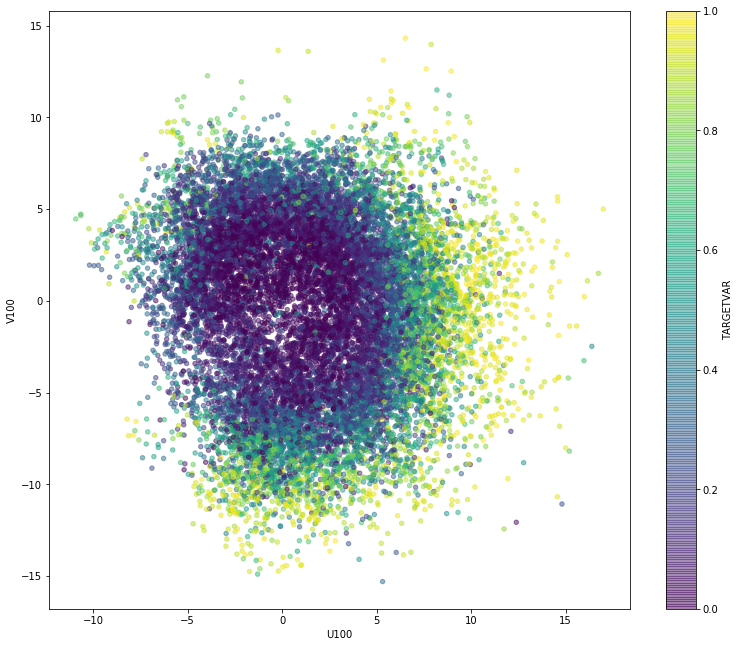

In [6]:
train[1].plot.scatter(x= 'U100',y= 'V100', c='TARGETVAR', figsize=(13,11), colormap='viridis', sharex=False, alpha= 0.5)

Wind farm 1 was arbitrarily chosen for this plot. The west-east wind speed is plotted on the horizontal axis and the south-north wind speed is plotted on the vertical axis. So, the further a point from the center (0,0) the stronger the wind at that point; and the relative place of the point to the center indicates the direction of the wind at that point.  
The color coding corresponds to the power output where purple means no output and yellow means maximum output as shown on the right.  
We can notice that, for this wind farm, the wind flows stronger to the east and south. As expected, the lighter the wind (the closer the point to the center), the lower the power output. We can also see that the data contains a considerable amount of noise, as we can see that the green points are mixed with the yellow points and also the purple points. meaning that, for the same wind speed and direction, there are different power outputs at different times. This limits the predictive power of the models we produce.
Now let's look at the same figure but instead of the color code indicating the amount generated it will only indicate whether any amount was generated or not.

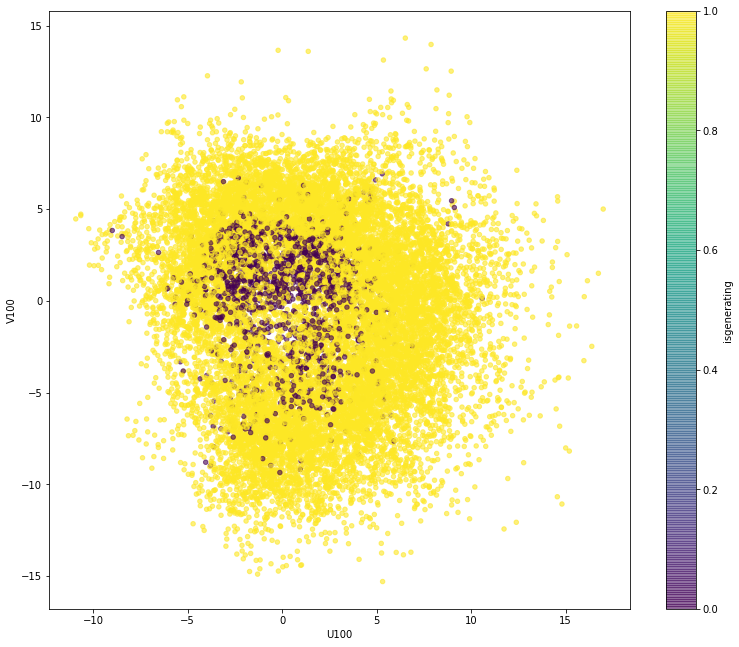

In [7]:
for zone in range(1,11):
    train[zone]['isgenerating'] = 1
    train[zone].loc[train[zone]['TARGETVAR'] == 0, 'isgenerating'] = 0
train[1].plot.scatter(x= 'U100',y= 'V100', c='isgenerating', figsize=(13,11), colormap='viridis', sharex=False, alpha= 0.6)
for zone in range(1,11):
    train[zone].drop('isgenerating',axis=1, inplace=True) # Removing the added feature

We also see here that the points where the wind farm is generating power and where it is not generating are mixed in the same area. Although the power generation is generally low in the areas where they are mixed, this still shows variations in output given almost the same input. What is also notable is that there are points where there is no generation and there is relatively high wind speed, especially to the south.  
Now let's generate some more features and further explore the data. We will generate the following features:  
From wind speed components at 10m and 100m height, we will generate wind speeds at 10m and 100m respectively.  
To give the model more information about the wind profile, we will also add the average of those speeds as a feature.  
We also add the angle of the wind direction in degrees. Also, the 3rd power of the wind speed and the average between the current wind speed and the last hour's wind speed as well as the average between the between the current wind speed and the following hour's wind speed.

In [8]:
# Generating features
for zone in range(1,11):
    train[zone]['ws100'] = np.sqrt(train[zone]['U100']**2 + train[zone]['V100']**2) # Wind speed at 100 m elevation
    train[zone]['ws10'] = np.sqrt(train[zone]['U10']**2 + train[zone]['V10']**2) # Wind speed at 10 m elevation
    train[zone]['ws_avg'] = (train[zone]['ws100'] + train[zone]['ws10'])/2 # Average between the two wind speeds above
    train[zone]['polar_angle100'] = (180/np.pi) * np.arctan2(train[zone]['V100'],train[zone]['U100']) # Wind direction at 100 m elevation
    train[zone]['polar_angle10'] = (180/np.pi) * np.arctan2(train[zone]['V10'],train[zone]['U10']) # Wind direction at 100 m elevation
    train[zone]['ws100pwr3'] = train[zone]['ws100']**3 # Wind speed at 100 m elevation cubed
    
    # Same features for the test set
    test[zone]['ws100'] = np.sqrt(test[zone]['U100']**2 + test[zone]['V100']**2)
    test[zone]['ws10'] = np.sqrt(test[zone]['U10']**2 + test[zone]['V10']**2)
    test[zone]['ws_avg'] = (test[zone]['ws100'] + test[zone]['ws10'])/2
    test[zone]['polar_angle100'] = (180/np.pi) * np.arctan2(test[zone]['V100'],test[zone]['U100'])
    test[zone]['polar_angle10'] = (180/np.pi) * np.arctan2(test[zone]['V10'],test[zone]['U10'])
    test[zone]['ws100pwr3'] = test[zone]['ws100']**3

# Combining all the zones into one dataframe
alldata_master = {}
for zone in range(1,11):
    train[zone]['type'] = 'training'
    test[zone]['type'] = 'testing'
    alldata_master[zone] = pd.concat([train[zone],test[zone]], sort=True, ignore_index=True)

Let's see which features are linearly correlated with the output.

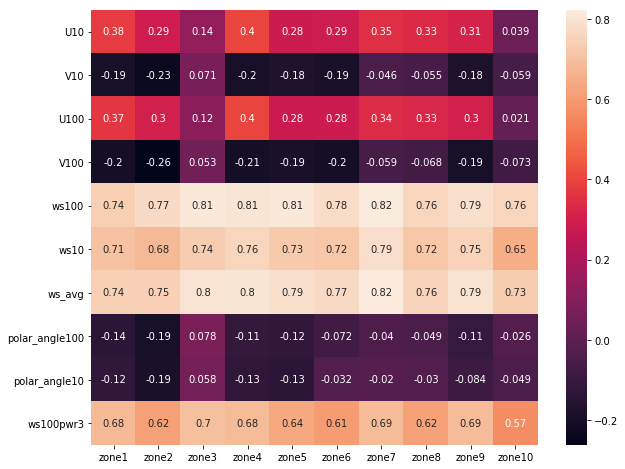

In [9]:
# Calculate and heatmap correlation between targetval and each feature in all zones
corr_df = pd.DataFrame(index=list(train[1])).drop(['TIMESTAMP','ZONEID','TARGETVAR'])
for zone in range(1,11):
    corr_arr = train[zone].corrwith(train[zone]['TARGETVAR'])
    corr_df = pd.merge(corr_df, corr_arr.to_frame(), left_index=True, right_index=True, how = 'inner')

fig, ax = plt.subplots(figsize=(10,8))
corr_df.columns = ['zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone6', 'zone7', 'zone8', 'zone9', 'zone10']
sns.heatmap(corr_df, annot=True, ax=ax)

The wind components are not expected to be linearly correlated with the output, as the output is supposed to be proportional to the absolute value of the wind component, i.e. it increases when the component increases both in the positive direction and the negative direction. We see here that there is a weak positive correlation between the zonal wind components (U10 and U100) and the output in most zones. I suppose that is because the wind flows to the east (positive direction) more than the west in those zones.  
The wind angle is also not expected to linearly correlate with the output.
The wind speeds are linearly correlated with the power output. The third power of the speed is not strongly correlated with the output which is contrary to what the equation we mentioned at the beginning of the notebook says. Probably this is because the equation is describing the relationship between one wind turbine and the speed of the air flowing perpendicular to it. In our case, however, we are dealing with the output of a wind farm and that output is normalized. So, we basically have the utilization of the wind farm and that may not necessarily be linearly correlated to the third power of the wind.
Also, the velocity in the equation is of the air that is flowing directly into the wind turbine whereas in our case here we have the air speed at 10 and 100 meters height and the wind turbines are likely neither 10 nor 100 meters long.
The wind speed at 100m shows a strong linear correlation with the output. The speed at 10m is a little less correlated. The more linearly correlated features are to the outcome, the easier it is to predict the outcome.  
Now let's see if the output of a farm is related to the wind speeds at other farms. We will also do this analysis for the first farm.

Text(0.5,0.01,'Wind Speed at 100m Above Ground')

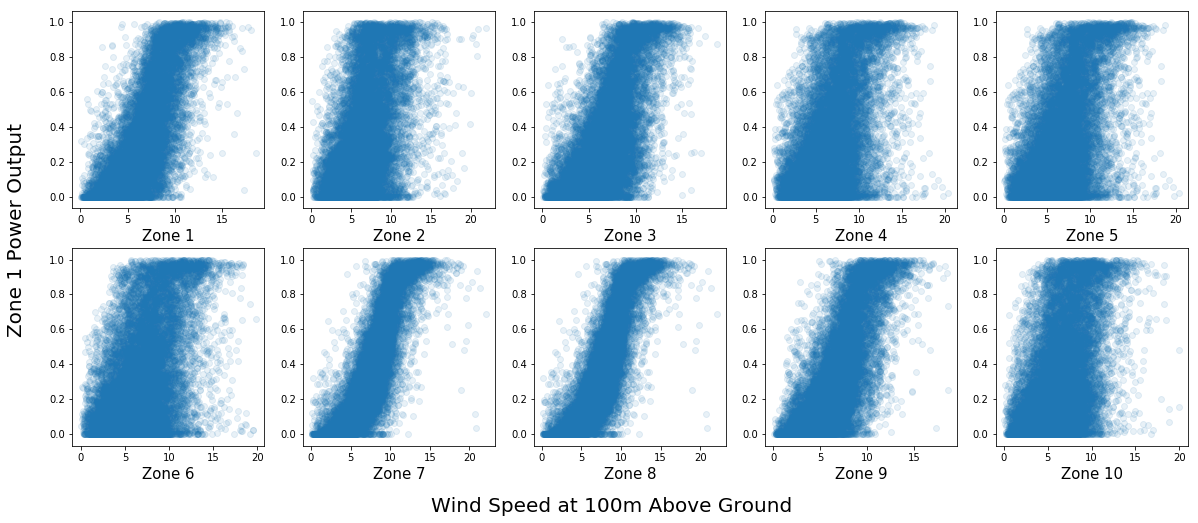

In [10]:
zone = 1

fig, axes = plt.subplots( nrows=2, ncols=5, figsize=(20,8) )

for ind,tnum in enumerate([1,2,3,4,5]):
    axes[0,ind].scatter(train[tnum]['ws100'], train[zone]['TARGETVAR'], alpha= 0.1)
    axes[0,ind].set_xlabel('Zone '+str(tnum), fontsize=15)
for ind,tnum in enumerate([6,7,8,9,10]):
    axes[1,ind].scatter(train[tnum]['ws100'], train[zone]['TARGETVAR'], alpha= 0.1)
    axes[1,ind].set_xlabel('Zone '+str(tnum), fontsize=15)
    
fig.text(0.08, 0.5, 'Zone '+str(zone)+' Power Output', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.01, 'Wind Speed at 100m Above Ground', ha='center', fontsize=20)

Some interesting results are emerging here. the output of zone 1 looks more strongly correlated with the speeds at zone 7 and 8. Also, the speeds at zone 7 and 8 look identical.  
This means that adding the wind speeds of other zones to the features may improve the performance of the model.  
We can also verify that the correlation is stronger with zones 7 and 8 by checking the correlation coefficient.

In [11]:
z1_corr = []
for zone in range(1,11):
    s=train[1]['TARGETVAR'].corr(train[zone]['ws100'])
    z1_corr.append(s)
for zone in range(1,11):
    print('Correlation between the output of zone 1 and the wind speed at zone {:2} is {:.5}'.format(zone,z1_corr[zone-1]))

Correlation between the output of zone 1 and the wind speed at zone  1 is 0.74062
Correlation between the output of zone 1 and the wind speed at zone  2 is 0.48256
Correlation between the output of zone 1 and the wind speed at zone  3 is 0.64258
Correlation between the output of zone 1 and the wind speed at zone  4 is 0.49126
Correlation between the output of zone 1 and the wind speed at zone  5 is 0.49126
Correlation between the output of zone 1 and the wind speed at zone  6 is 0.47654
Correlation between the output of zone 1 and the wind speed at zone  7 is 0.83616
Correlation between the output of zone 1 and the wind speed at zone  8 is 0.83616
Correlation between the output of zone 1 and the wind speed at zone  9 is 0.7404
Correlation between the output of zone 1 and the wind speed at zone 10 is 0.43158


As we said, the correlation is higher with speeds at zones 7 and 8.  
Now let's look at the distribution of the output in the training data.

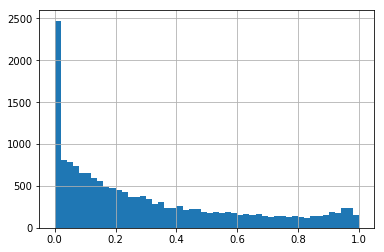

In [12]:
train[1]['TARGETVAR'].hist(bins=50)

We see that there are a lot more zeros than other values for zone 1 and low observations are generally more frequent than high observations. The fact that zeros are more frequent can be possibly utilized by making a model that classifies the output into zeros and non-zeros and then have another model that predicts the quantity of the nonzero values.  
Now let's look at a line plot of the wind speed and the power output, so we can have a better understanding of how they change together. If we look at the correlation heatmap above, we see that the zone where the speed is most correlated with the output is zone 7. So, we'll make the next plot for zone 7 to possibly see a clear relationship.

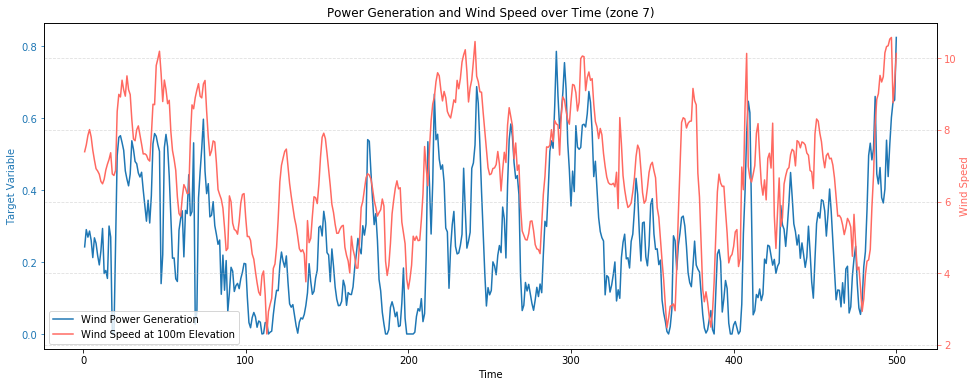

In [13]:
fig, ax1 = plt.subplots(figsize=(16,6))
ins1 = ax1.plot(list(range(1,501)),train[7]['TARGETVAR'][-500:], color='#1f77b4', label='Wind Power Generation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Target Variable', color='#1f77b4')
ax1.tick_params('y', colors='#1f77b4')
ax2 = ax1.twinx()
ins2 = ax2.plot(list(range(1,501)),train[7]['ws100'][-500:], color='#ff6961', label='Wind Speed at 100m Elevation')
ax2.set_ylabel('Wind Speed', color='#ff6961')
ax2.tick_params('y', colors='#ff6961')
ax1.set_title("Power Generation and Wind Speed over Time (zone 7)")
plt.grid(linestyle='--', alpha=0.4)
ins = ins1+ins2
labs = [l.get_label() for l in ins]
ax2.legend(ins, labs, loc=0)

The figure shows the last 500 hours in the training data for zone 7. We see that the output (in blue) is apparently not only affected by the speed of the wind but also by the change in the wind speed. For example, if the wind speed is decreasing the output is likely to decrease, even if the speed is still high after decreasing.  
Hypothetically, if the model knows the power output for the past few hours as well as the forecasted change of the wind speed over the past few hours and the next few hours, it will be able to produce much more accurate predictions. However, wind power forecasting is typically done 24 to 48 hours before real-time, so we cannot have the output of a few hours before the real-time as an input to the model. However, we can have the wind speeds or acceleration before and after real-time because the values we have are forecasts.  
Looking at this figure, we can decide it is a good idea to add a measure wind speed change to the features. These added features can be the difference between the wind speeds of consecutive hours or the acceleration of the wind. We can also add the forecasted speeds of the previous hours and following hours.
We can also gain more insight by looking at the autocorrelation plot of the target value.

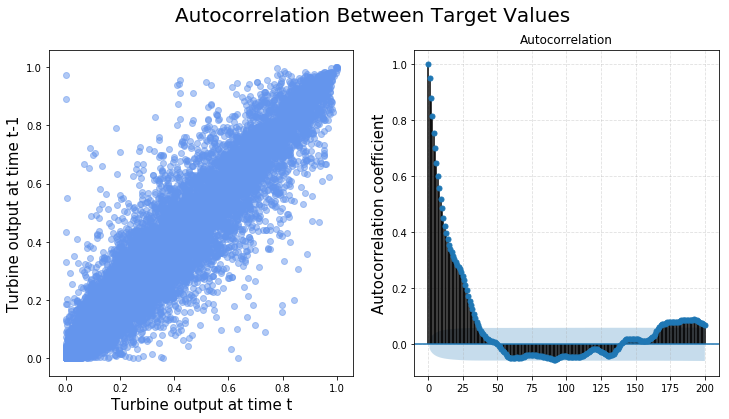

In [14]:
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(12,6))
plt.suptitle("Autocorrelation Between Target Values", fontsize=20)
series0 = train[2]['TARGETVAR']
axes[0].scatter(series0, series0.shift(periods=1), color="cornflowerblue", alpha=0.5)
axes[0].set_xlabel("Turbine output at time t", fontsize=15)
axes[0].set_ylabel("Turbine output at time t-1", fontsize=15)
axes[1].set_ylabel("Autocorrelation coefficient", fontsize=15)
axes[1].grid(linestyle='--', alpha=0.4)
tsap.plot_acf(series0.dropna(), lags=200, ax=axes[1])
plt.show()

The figure on the left shows the relationship between the power output at time t and at time t-1. We can see that there is a high correlation between the two. In other words, if the output is high this hour it is likely that it will be high in the next hour as well, same if it is low. The autocorrelation graph on the right also shows that there is a high autocorrelation between consecutive values. This indicates that the predictions can possibly be a lot more accurate if we forecast for a short period ahead than for a long period. For example, forecasting for six hours ahead would probably be more accurate than predicting 24 or 48 hours ahead.
## Feature Engineering and Selection
So, at this stage we have already added a couple of features and we gained some ideas from the analyses we made for adding more features, but how can we decide which of the added features is actually adding predictive power to the model. Also, if we want to add wind speeds of the previous and following hours to improve the model performance, how many hours should we add? one? two? five?  
One method to take these decisions is to add all the features that are expected to improve the performance of the model and then see whether the performance has improved or not and then manually add or remove features until we reach an even better performance.  
In this notebook, we will use another method however. Since the training dataset we are dealing with is not very large, we can try and run a model whenever we add a feature to see if this feature has improved the performance or not. If the model performance has increased, we keep the feature and if not, we don't. This method is relatively computationally expensive and is not suitable for large datasets or when we generate many features. It can be also considered a heuristic as it does not give the optimal solution. This method does not take into account the interactions between the features. For example, we add some feature (a) and after we run the model we see that it doesn't improve the validation error, so we discard it. Then we add another feature (b) and this one also does not improve the error, so we also discard it. Possibly if these two features were added at the same time they would improve the error score. So in short, this method does not take into account the interaction between different features.  
Now knowing how to evaluate the added features as well as the limitations of the selected method, we can now continue with feature engineering. First, we will create a function that we will use to evaluate the model after adding the features. The model that we will use is an XGBoost model with the default parameters. The only parameter that is changed is 'tree_method' and we changed it to use the GPU instead to the CPU while training the model; which makes training the model faster.

In [15]:
# Function to evaluate the changes made in the dataset
def evaluate_alldata(ad):
    # Split back to train and test
    train2 = {}
    for zone in range(1,11):
        train2[zone] = ad[zone].loc[ad[zone]['type'] == 'training']
        train2[zone].drop('type',axis=1,inplace=True)
    # Combine the data of all zones to one dataframe
    lim = int(len(train2[1])*0.9)
    alltrain = pd.DataFrame(train2[1].iloc[:lim,:])
    alleval = pd.DataFrame(train2[1].iloc[lim:,:])
    for zone in range(2,11):
        alltrain = alltrain.append(train2[zone].iloc[:lim,:], sort=True, ignore_index=True)
        alleval = alleval.append(train2[zone].iloc[lim:,:], sort=True, ignore_index=True)
    # Apply one-hot encoding to the 'ZONEID' column
    alltrain = pd.get_dummies(alltrain, columns=['ZONEID'], drop_first=True)
    alleval = pd.get_dummies(alleval, columns=['ZONEID'], drop_first=True)

    tr1 = alltrain.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
    tr=tr1.drop('TARGETVAR', axis=1)
    d_train = xgb.DMatrix(tr, tr1['TARGETVAR'].copy())

    ev1 = alleval.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
    ev=ev1.drop('TARGETVAR', axis=1)
    d_valid = xgb.DMatrix(ev, ev1['TARGETVAR'].copy())
    
    param = {'tree_method': 'gpu_hist'}
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    num_round = 200
    model = xgb.train(param, d_train, num_round, watchlist, early_stopping_rounds=5, verbose_eval=False)
    return model.best_score

Now that we have defined our function we can start with adding features, but first let's check the performance of the model after we added the features of the previous section.

In [16]:
error = evaluate_alldata(alldata_master)
print('Validation error after adding the features of the previous section equals {:.5}'.format(error))

Validation error after adding the features of the previous section equals 0.18147


It is worth noting that the error rate here is calculated from the validation set, not the from the test set as the error scores for the benchmark and initial model were calculated. We will use this validation error to help us select the features and fine tune the model; after that, we will evaluate the model on the test set and compare it to the initial model and the benchmark and comment on the performance improvement.  
Now let's add the some of the features that we talked about before. We can add acceleration as a measure of the change of wind speed. 
$$a=\frac{∆v}{∆t}$$
Technically, what we will measure here will _not_ be acceleration because we only measure change is speed regardless of the direction, i.e. instead of the velocity in the numerator we will put speed.  
Acceleration over different time spans can be calculated. We will add the wind acceleration features incrementally over increasing number of hours until the error rate stops improving. We will add acceleration coming from backward and acceleration going forward as shown in the figure below.
<img src="https://raw.githubusercontent.com/Mo-Saif/Wind-Power-Forecasting/master/res/acceleration.PNG">

In [17]:
alldata = copy.deepcopy(alldata_master)
error = {}
for lag in range(1,16):
    for zone in range(1,11):
        alldata[zone]['acc_{}b'.format(lag)] = (alldata[zone]['ws100'] - alldata[zone]['ws100'].shift(lag))/lag
        alldata[zone]['acc_{}f'.format(lag)] = (alldata[zone]['ws100'].shift(-lag) - alldata[zone]['ws100'])/lag
    error[lag] = evaluate_alldata(alldata)
# To print all the error rate of all the trials
for i in range(1,16):
    print('RMSE for {:2} hour(s) is {}'.format(i,error[i]))

lag_num = min(error, key=error.get)
print('The optimal number of hours to add is {} and the corresponding RMSE is {:.4}'
      .format(lag_num, error[lag_num]))

RMSE for  1 hour(s) is 0.176094
RMSE for  2 hour(s) is 0.176251
RMSE for  3 hour(s) is 0.175337
RMSE for  4 hour(s) is 0.175408
RMSE for  5 hour(s) is 0.175262
RMSE for  6 hour(s) is 0.17556
RMSE for  7 hour(s) is 0.175774
RMSE for  8 hour(s) is 0.175452
RMSE for  9 hour(s) is 0.175003
RMSE for 10 hour(s) is 0.175404
RMSE for 11 hour(s) is 0.176076
RMSE for 12 hour(s) is 0.175386
RMSE for 13 hour(s) is 0.175745
RMSE for 14 hour(s) is 0.175407
RMSE for 15 hour(s) is 0.176475
The optimal number of hours to add is 9 and the corresponding RMSE is 0.175


As we see, adding 9 average acceleration values in each direction gave the lowest error. We made this evaluation on a copy of the dataset. Now we add the optimal number of features to the original dataset.

In [18]:
# Adding the optimal number of acceleration lags to the original set
for zone in range(1,11):
    for lag in range(1,lag_num+1):
        alldata_master[zone]['acc_{}b'.format(lag)] = (alldata_master[zone]['ws100'] - alldata_master[zone]['ws100'].shift(lag))/lag
        alldata_master[zone]['acc_{}f'.format(lag)] = (alldata_master[zone]['ws100'].shift(-lag) - alldata_master[zone]['ws100'])/lag

We can also see if adding the previous and following wind speeds would improve the error rate. We start here with the speeds of previous hours.

In [19]:
alldata = copy.deepcopy(alldata_master)
error = {}
for lag in range(1,16):
    for zone in range(1,11):
        alldata[zone]['ws100_l{}'.format(lag)] = alldata[zone]['ws100'].shift(lag)
    error[lag] = evaluate_alldata(alldata)
# To print all the error rate of all the trials
for i in range(1,16):
    print('RMSE for {:2} speed lag(s) is {}'.format(i,error[i]))

lag_num = min(error, key=error.get)
print('The optimal number of speed lags to add is {} and the corresponding RMSE is {:.4}'
      .format(lag_num, error[lag_num]))

RMSE for  1 speed lag(s) is 0.175745
RMSE for  2 speed lag(s) is 0.175027
RMSE for  3 speed lag(s) is 0.175045
RMSE for  4 speed lag(s) is 0.175304
RMSE for  5 speed lag(s) is 0.176124
RMSE for  6 speed lag(s) is 0.175931
RMSE for  7 speed lag(s) is 0.176358
RMSE for  8 speed lag(s) is 0.175488
RMSE for  9 speed lag(s) is 0.175762
RMSE for 10 speed lag(s) is 0.17574
RMSE for 11 speed lag(s) is 0.175844
RMSE for 12 speed lag(s) is 0.174686
RMSE for 13 speed lag(s) is 0.175343
RMSE for 14 speed lag(s) is 0.175271
RMSE for 15 speed lag(s) is 0.175633
The optimal number of speed lags to add is 12 and the corresponding RMSE is 0.1747


We see that adding speeds of the previous 12 hours slightly improves the error rate, so we add them to the original dataset.

In [20]:
for lag in range(1,lag_num+1):
    for zone in range(1,11):
        alldata_master[zone]['ws100_l{}'.format(lag)] = alldata_master[zone]['ws100'].shift(lag)

Now let's see if adding the following hours' wind speeds will improve the error rate.

In [21]:
# Determining the optimal number of wind speed leads to add to the dataset
alldata = copy.deepcopy(alldata_master)
error = {}
for lead in range(1,11):
    for zone in range(1,11):
        alldata[zone]['ws100_l-{}'.format(lead)] = alldata[zone]['ws100'].shift(-lead)
    error[lead] = evaluate_alldata(alldata)

# To print all the error rate of all the trials
for i in range(1,11):
    print('RMSE for {:2} lead(s) is {}'.format(i,error[i]))

lead_num = min(error, key=error.get)
print('The optimal number of leads to add is {} and the corresponding RMSE is {:.4}'
      .format(lead_num, error[lead_num]))

RMSE for  1 lead(s) is 0.175083
RMSE for  2 lead(s) is 0.175229
RMSE for  3 lead(s) is 0.176304
RMSE for  4 lead(s) is 0.176196
RMSE for  5 lead(s) is 0.176499
RMSE for  6 lead(s) is 0.175769
RMSE for  7 lead(s) is 0.175458
RMSE for  8 lead(s) is 0.175289
RMSE for  9 lead(s) is 0.175756
RMSE for 10 lead(s) is 0.175308
The optimal number of leads to add is 1 and the corresponding RMSE is 0.1751


We see that this does not reduce the error, as the lowest error we have seen so far is 0.1747. Hence, we don't add any to the original dataset.  
We can also check if adding time components like hour and day will improve the error rate.

In [22]:
alldata = copy.deepcopy(alldata_master)
error = {}
for zone in range(1,11):
    alldata[zone]['hour'] = alldata[zone].TIMESTAMP.dt.hour
    alldata[zone] = pd.get_dummies(alldata[zone], columns=['hour'], drop_first=True)

#     alldata[zone]['month'] = alldata[zone].TIMESTAMP.dt.month
#     alldata[zone] = pd.get_dummies(alldata[zone], columns=['month'], drop_first=True)

#     alldata[zone]['year'] = alldata[zone].TIMESTAMP.dt.year
#     alldata[zone] = pd.get_dummies(alldata[zone], columns=['year'], drop_first=True)

#     alldata[zone]['day'] = alldata[zone].TIMESTAMP.dt.day
#     alldata[zone] = pd.get_dummies(alldata[zone], columns=['day'], drop_first=True)

error['time_added'] = evaluate_alldata(alldata)
print('RMSE after adding hours is {}'.format(error['time_added']))

RMSE after adding hours is 0.174613


After trying different combinations of time components, it was found that adding only hours and one-hot encoding it makes improvement in the error rate.  
We will add this change to the original dataset.

In [23]:
# Adding the time components to the original set
for zone in range(1,11):
    alldata_master[zone]['hour'] = alldata_master[zone].TIMESTAMP.dt.hour
    alldata_master[zone] = pd.get_dummies(alldata_master[zone], columns=['hour'], drop_first=True)

We can also check if adding the wind speeds of all the zones instead of one zone would improve the prediction or not.

In [24]:
alldata = copy.deepcopy(alldata_master)
error = {}
for zone1 in range(1,11):
    for zone2 in range(1,11):
        alldata[zone1]['ws100_z{}'.format(zone2)] = alldata[zone2]['ws100']
for zone in range(1,11):
    alldata[zone] = alldata[zone].drop('ws100',axis=1)

error['all_zones_added'] = evaluate_alldata(alldata)
print('RMSE after adding wind speeds of all zones is {:.4}'.format(error['all_zones_added']))

RMSE after adding wind speeds of all zones is 0.1757


Adding the wind speed of all zones doesn't improve the predictions, so we won't add them to the original dataset. If we had a separate model for each zone we could've added only the relevant wind speeds to each zone, but because we have one model for all, we can't do that.  
## Fine-tuning
Now that we know which features to use we will move to hyper-parameter tuning. We will do a grid search, but we won't use scikit-learn's GridSearchCV because it requires using cross-validation and we won't use it here. We will first prepare the original dataset for fine-tuning in the next cell.

In [25]:
# Preparing the data for parameter tuning
train2 = {}
test2 = {}
for zone in range(1,11):
    train2[zone] = alldata_master[zone].loc[alldata_master[zone]['type'] == 'training']
    test2[zone] = alldata_master[zone].loc[alldata_master[zone]['type'] == 'testing']
    train2[zone].drop('type',axis=1,inplace=True)
    test2[zone].drop('type',axis=1,inplace=True)

# Combine zones and 1HE
lim = int(len(train2[1])*0.9)
alltrain = pd.DataFrame(train2[1].iloc[:lim,:])
alleval = pd.DataFrame(train2[1].iloc[lim:,:])
allfulltrain = pd.DataFrame(train2[1])
alltest = pd.DataFrame(test2[1])
for zone in range(2,11):
    alltrain = alltrain.append(train2[zone].iloc[:lim,:], sort=True, ignore_index=True)
    alleval = alleval.append(train2[zone].iloc[lim:,:], sort=True, ignore_index=True)
    allfulltrain = alltrain.append(train2[zone], sort=True, ignore_index=True)
    alltest = alltest.append(test2[zone],sort=True, ignore_index=True)

alltrain = pd.get_dummies(alltrain, columns=['ZONEID'], drop_first=True)
alleval = pd.get_dummies(alleval, columns=['ZONEID'], drop_first=True)
allfulltrain = pd.get_dummies(allfulltrain, columns=['ZONEID'], drop_first=True)
alltest = pd.get_dummies(alltest, columns=['ZONEID'], drop_first=True)

tr1 = alltrain.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
tr=tr1.drop('TARGETVAR', axis=1)
d_train = xgb.DMatrix(tr, tr1['TARGETVAR'])

ev1 = alleval.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
ev=ev1.drop('TARGETVAR', axis=1)
d_valid = xgb.DMatrix(ev, ev1['TARGETVAR'])

ts1 = alltest.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
ts=ts1.drop('TARGETVAR', axis=1)
dtest = xgb.DMatrix(ts, ts1['TARGETVAR'])

ftr1 = allfulltrain.drop(['TIMESTAMP'], axis=1).dropna().reset_index(drop=True)
ftr=ftr1.drop('TARGETVAR', axis=1)
d_fulltrain = xgb.DMatrix(ftr, ftr1['TARGETVAR'])

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

We won't have to choose a specific number of trees while tuning the model because we will use the early stopping rounds option which automatically determines the optimal number of trees to train. We will perform the tuning at 0.1 learning rate (eta) which is lower than the default learning rate of 0.3. The reason for that is that the lower the learning rate the better the results we obtain.  
We will fine tune the following hyper-parameters:  
*max_depth*: The maximum depth of a tree. Lower values reduce overfitting.  
*subsample*: The fraction of observations to be selected for each tree. Selection is done by random sampling. Lower values reduce overfitting.  
*colsample_bytree*: The fraction of features to consider while searching for the best split. These will be randomly selected. Lower values reduce overfitting.  
*min_child_weight*: The minimum sum of instance weight (hessian) needed in a child (leaf). Higher values reduce overfitting.  
First, let's try different values for tree depth.

In [26]:
result = {}
for i in range(1,11):
    param = {
        'eta':0.1,
        'max_depth':i,
#         'subsample':1,
#         'colsample_bytree':1,
        'tree_method': 'gpu_hist'
#         'min_child_weight':1
        }
    model = xgb.train(param, d_train, 2000, watchlist, early_stopping_rounds=10, verbose_eval=False)
    result[i] = model.best_score
    print('Validation error when tree depth is {:2} equals {}'.format(i, result[i]))

Validation error when tree depth is  1 equals 0.187232
Validation error when tree depth is  2 equals 0.177817
Validation error when tree depth is  3 equals 0.17569
Validation error when tree depth is  4 equals 0.17458
Validation error when tree depth is  5 equals 0.174032
Validation error when tree depth is  6 equals 0.173439
Validation error when tree depth is  7 equals 0.173116
Validation error when tree depth is  8 equals 0.172961
Validation error when tree depth is  9 equals 0.172569
Validation error when tree depth is 10 equals 0.172978


We see that 9 branches give the optimal error rate, so we choose it and move on to choose the values of subsample and colsapmle_bytree

In [27]:
result = {}
best_e, best_i, best_j = 1, 0, 0
for i in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    for j in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        param = {
            'eta':0.1,
            'max_depth':9,
            'subsample':i,
            'colsample_bytree':j,
            'tree_method': 'gpu_hist'
    #         'min_child_weight':1
            }
        model = xgb.train(param, d_train, 500, watchlist, early_stopping_rounds=5, verbose_eval=False)
        result['subsample: {}, colsample_bytree: {}'.format(i,j)] = model.best_score
        print('Validation error when row sample = {} and column sample = {} equals {}'.format(i, j, result['subsample: {}, colsample_bytree: {}'.format(i,j)]))
        if(model.best_score <= best_e):
            best_e = model.best_score
            best_i = i
            best_j = j
print('The minimum validation error equals {:.4} and is obtained when row sample = {} and column sample = {}'.format(best_e, best_i, best_j))

Validation error when row sample = 0.5 and column sample = 0.5 equals 0.174062
Validation error when row sample = 0.5 and column sample = 0.6 equals 0.173895
Validation error when row sample = 0.5 and column sample = 0.7 equals 0.173946
Validation error when row sample = 0.5 and column sample = 0.8 equals 0.173128
Validation error when row sample = 0.5 and column sample = 0.9 equals 0.17372
Validation error when row sample = 0.5 and column sample = 1.0 equals 0.173718
Validation error when row sample = 0.6 and column sample = 0.5 equals 0.17346
Validation error when row sample = 0.6 and column sample = 0.6 equals 0.173373
Validation error when row sample = 0.6 and column sample = 0.7 equals 0.173531
Validation error when row sample = 0.6 and column sample = 0.8 equals 0.173555
Validation error when row sample = 0.6 and column sample = 0.9 equals 0.173516
Validation error when row sample = 0.6 and column sample = 1.0 equals 0.173392
Validation error when row sample = 0.7 and column samp

Now we set the previous parameters to their optimal values and continue with tuning min_child_weight.

In [28]:
result = {}
for i in range(1,11):
    param = {
        'eta':0.1,
        'max_depth':9,
        'subsample':0.9,
        'colsample_bytree':0.9,
        'tree_method': 'gpu_hist',
        'min_child_weight':i
        }
    model = xgb.train(param, d_train, 500, watchlist, early_stopping_rounds=5, verbose_eval=False)
    result[i] = model.best_score
    print('Validation error when minimum child weight is {:2} equals {}'.format(i, result[i]))

Validation error when minimum child weight is  1 equals 0.172039
Validation error when minimum child weight is  2 equals 0.172219
Validation error when minimum child weight is  3 equals 0.173057
Validation error when minimum child weight is  4 equals 0.172585
Validation error when minimum child weight is  5 equals 0.17297
Validation error when minimum child weight is  6 equals 0.172393
Validation error when minimum child weight is  7 equals 0.173117
Validation error when minimum child weight is  8 equals 0.172471
Validation error when minimum child weight is  9 equals 0.172524
Validation error when minimum child weight is 10 equals 0.172199


We see that min_child_weight = 1 gives the optimal solution. However, to reduce overfitting we can choose min_child_weight = 10 which gives a comparable performance on the validation set.
## Predicting on the Test Set
Now that we've tuned our model, let's use it on the test set and see how well it will perform. For predicting on the test set, we will lower the learning rate to 0.5 to obtain more accurate results.

In [30]:
param = {
    'eta':0.05,
    'max_depth':9,
    'subsample':0.9,
    'colsample_bytree':0.9,
    'tree_method': 'gpu_hist',
    'min_child_weight':10
    }
model = xgb.train(param, d_train, 2000, watchlist, early_stopping_rounds=10, verbose_eval=False)
ntrees = model.best_ntree_limit
model = xgb.train(param, d_fulltrain, ntrees, verbose_eval=False)
pred = model.predict(dtest)
m = mse(ts1['TARGETVAR'], pred)
rm = np.sqrt(m)
print('RMSE score of the XGBoost model after feature engineering and parameter tuning is {:.5}'.format(rm))

RMSE score of the XGBoost model after feature engineering and parameter tuning is 0.16962


The error score on the test set is 0.1696 which is lower than the error of the initial model me made earlier 0.1782. In a practical sense, this little difference would probably not make much of a difference, but in a competitive setting, it definitely would. The winning team of the [H2O Hackathon](https://datahack.analyticsvidhya.com/contest/h2o-open-tour-nyc-hackathon/pvt_lb) we mentioned before scored 0.16946 which is very close to the score we have here. In fact, if this model had joined the hackathon, it would've scored second; despite the relatively simple methods we used here.
## Conclusion
Let's wrap the notebook up by briefly summarizing what we've done. After loading the data, we calculated a benchmark RMSE score for the test set, which was 0.304. Then, and before analyzing or adding any features, we trained an XGBoost model with the default parameters on the data. This model had an RMSE score of 0.1782 on the test set. This model showed us the amount of performance that we can obtain before exerting any significant effort. After that, we analyzed the data and generated some features based on the insights we obtained about the data. We selected which features to keep based on whether they improve the performance of a model with the default parameters or not. We then fine-tuned the model and selected the optimal parameters. We tested the final model on the test set and the final score was 0.1696 which, compared to the scores in the H2O Hackathon, would score second.  
In this notebook, we used a relatively rough method. Doing feature engineering for each wind farm separately and then making a separate model for each one would probably improve the score, but it would also take significantly longer time to do.
## About the Author
Mohammed Saif is a data scientist who also has experience in the mathematical optimization and scientific computing domains. He studied for his industrial engineering degree at the Middle East Technical University, Ankara, Turkey.  
To contact Mohammed, you can send an email to [m.saif.ka@gmail.com](mailto:m.saif.ka@gmail.com)  
Or through LinkedIn: [www.linkedin.com/in/MoSaifK](http://www.linkedin.com/in/MoSaifK)